In [1]:
#Authors: 
#Ayush Sharma (Delhi Technological University)
#Mrigank Sondhi (Delhi Technological University)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras import regularizers

In [3]:
raw_data = pd.read_csv('jm1.csv')
# raw_data = pd.read_csv('kc1.csv')
raw_data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [4]:
X = raw_data[raw_data.columns[0:21]]
Y = pd.DataFrame(raw_data[raw_data.columns[21]])

#DATA CLEANING

In [5]:
#Values having '?': uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount
Y = Y[X['branchCount'] != '?']
X = X[X['branchCount'] != '?']
X.reset_index(inplace = True, drop = True)
Y.reset_index(inplace = True, drop = True)
Y = Y['defects']

In [6]:
for i in range(Y.size):
  if (Y[i] == True):
    Y.loc[i] = 1.0
  else:
    Y.loc[i] = 0.0

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

In [8]:
Y

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10875    0.0
10876    0.0
10877    0.0
10878    0.0
10879    0.0
Name: defects, Length: 10880, dtype: object

#Preprocessing the Data: 
1.Train Test Split
2.Scaling

In [9]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [12]:
X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Y_train= np.reshape(Y_train, (Y_train.shape[0]Y_train.shape[1],1))
# Y_test= np.reshape(Y_test, (Y_test.shape[0],Y_test.shape[1],1))

#Neural Network Model

In [13]:
model = Sequential()
model.add(layers.Conv1D(64, 1, activation='relu', padding='valid', input_shape=(21,1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 1 , activation='relu'))
model.add(layers.Conv1D(128, 1, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 64)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           16512     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, epochs = 4000, batch_size = 1000)

Streaming output truncated to the last 5000 lines.
11/11 [==============================] - 0s 18ms/step - loss: 0.1868 - accuracy: 0.9191
Epoch 1502/4000
11/11 [==============================] - 0s 18ms/step - loss: 0.1930 - accuracy: 0.9200
Epoch 1503/4000
11/11 [==============================] - 0s 18ms/step - loss: 0.1862 - accuracy: 0.9216
Epoch 1504/4000
11/11 [==============================] - 0s 19ms/step - loss: 0.1928 - accuracy: 0.9192
Epoch 1505/4000
11/11 [==============================] - 0s 19ms/step - loss: 0.1906 - accuracy: 0.9197
Epoch 1506/4000
11/11 [==============================] - 0s 19ms/step - loss: 0.1908 - accuracy: 0.9212
Epoch 1507/4000
11/11 [==============================] - 0s 18ms/step - loss: 0.1886 - accuracy: 0.9204
Epoch 1508/4000
11/11 [==============================] - 0s 19ms/step - loss: 0.1827 - accuracy: 0.9229
Epoch 1509/4000
11/11 [==============================] - 0s 18ms/step - loss: 0.1863 - accuracy: 0.9227
Epoch 1510/4000
11/11 [======

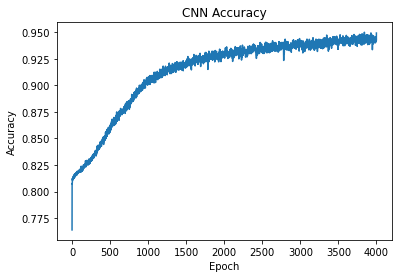

In [17]:
plt.plot(history.history['accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [21]:
loss, acc=model.evaluate(X_test, Y_test)
print("Accuracy=")
print(acc*100, "%")

68/68 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9738
Accuracy=
97.38051295280457 %


In [22]:
Y_pred= model.predict(X_test)
Y_pred=tf.greater(Y_pred, 0.1)
Y_pred

<tf.Tensor: shape=(2176, 1), dtype=bool, numpy=
array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])>

In [23]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=("No Fault", "Fault")))

[[1577  166]
 [   3  430]]
              precision    recall  f1-score   support

    No Fault       1.00      0.90      0.95      1743
       Fault       0.72      0.99      0.84       433

    accuracy                           0.92      2176
   macro avg       0.86      0.95      0.89      2176
weighted avg       0.94      0.92      0.93      2176



In [25]:
mat=tf.math.confusion_matrix(Y_test,Y_pred, num_classes=2)
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1577,  166],
       [   3,  430]], dtype=int32)>

In [26]:
loss, recall= model.evaluate(X_test,Y_test)

68/68 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9738
